<a href="https://colab.research.google.com/github/freddyflounder/Numerical-Analysis-Algorithms/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


# Common ML Mistakes

## Overfitting
###symptom: gap between training and testing data accuracy
Two common types of regularization: 
Lasso or L1
Ridge or L2

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
bc = pd.DataFrame(df.data,columns=df.feature_names)
bc['target'] = pd.Series(df.target)

In [3]:
bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Example: L1 regularization

In [7]:
from sklearn.model_selection import train_test_split

X, y = bc.iloc[:, :-1].values, bc.iloc[:,-1].values

X_train, X_test, y_train, y_test =\
  train_test_split(X, y,
                   test_size=0.3,
                   random_state=0,
                   stratify=y)

Scale Features

In [8]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty ='l1', C=0.1, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)

print("training accuracy: ", round(lr.score(X_train_std, y_train),3))
print("test accuracy: ", round(lr.score(X_test_std, y_test),3))
#penalty gives regression type, c varies degree of regularization

training accuracy:  0.982
test accuracy:  0.942


##Not standardizing data
###symptom: high weight to features of a high magnitude

In [12]:
bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
#note that test-train split is done above
#StandardScaler is shown above, which scales according to the standard deviation from the mean for that feat 
#the other common approach is MinMaxScaler, which does not assume need for distribution of variables
from sklearn.preprocessing import MinMaxScaler
Scale = MinMaxScaler()
X_train_minmax = Scale.fit_transform(X_train)
X_test_minmax = Scale.transform(X_test)

In [16]:
X_test_minmax

array([[0.45981684, 0.58978695, 0.45013515, ..., 0.53565277, 0.28470032,
        0.30021231],
       [0.24873892, 0.43151843, 0.24043249, ..., 0.32142611, 0.2490142 ,
        0.2158811 ],
       [0.32122043, 0.42069665, 0.34499929, ..., 0.61488116, 0.25197161,
        0.49214437],
       ...,
       [0.26000294, 0.37436591, 0.25316546, ..., 0.21687909, 0.32137224,
        0.07728238],
       [0.34864587, 0.16875211, 0.33247973, ..., 0.27402687, 0.15141956,
        0.05239915],
       [0.09936824, 0.28779168, 0.09112249, ..., 0.        , 0.06762618,
        0.08781316]])

In [17]:
X_test_std

array([[ 0.82242363,  1.85909083,  0.77729613, ...,  0.61566933,
         0.19163397,  0.3764545 ],
       [-0.36880044,  0.76201632, -0.40451172, ..., -0.32062422,
        -0.10558497, -0.18072213],
       [ 0.04025098,  0.68700268,  0.18478867, ...,  0.96194288,
        -0.08095356,  1.64455034],
       ...,
       [-0.30523164,  0.36585053, -0.33275337, ..., -0.77755475,
         0.49706337, -1.09644443],
       [ 0.1950272 , -1.05940866,  0.11423298, ..., -0.52778613,
        -0.91842128, -1.26084801],
       [-1.21177803, -0.2342586 , -1.24596853, ..., -1.72544094,
        -1.61631105, -1.02686749]])

##Focusing on the Wrong Factors
###Symptom: fine tuning does not see much improvement
Make a wish list of data you want
Find and incorporate variables you do not currently have

Measure their impact on your model's performance

Reach out to another team

Consider that more is not always better

##Data Leakage
###Symptom: results look too good to be true
Especially prevalent with time series

Outside information is affecting your training and model

Solution: check for too distinguished features

In [18]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Recall that for time series, a normal randomized test split is not appropriate

In [ ]:
#sort values by date asc: df.sort_values('Month')
#first 75% of records in train, remaining in test:
##train_len=int(len(df)*.75)
##train, test = df[0:train_len], df[train_len:len(df)]
##print(train.shape, test.shape)

Repeat preprocessing steps at each fold of data

## Assuming Deployment is a breeze
Don't assume model deployment is easy;
depending on use, this may not be so

Plan deployment strategy from the beginning of the project

Questions:


*   Will you be scheduling batch predictions or is there a need for real time? (flask, APIs, etc)
*   What are the compute requirements
*   Will you be re-deploying it?

Knowing these beforehand helps with handing over usable data




##Assuming machine learning is the answer

Do I have a diverse dataset that's also large?

Do I have a well-defined problem?

Do I have a clear outcome to predict and a hypothesis to test?

Would an ad-hoc analysis work instead of a full ML model?

Is my data labeled?

Am I predicting for predicting's sake?

##Developing in a silo

Don't lose perspective on the intangibles that go into a project:
*   Invite others to look at your code
*   Reach out to established data scientists in your field
*   Thoroughly version and document your code so that it can be reproduced
*   Communicate regularly with your subject matter experts
*   Take a break from the screen and go for a walk

## Not treating for imbalanced sampling

In [23]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features = 2, n_informative=2,
                            n_redundant = 0, n_repeated = 0, n_classes = 3,
                            n_clusters_per_class=1,
                            weights=[0.01, 0.05, 0.94],
                            class_sep=8, random_state=0)

In [24]:
df = pd.DataFrame(X)
df.columns = ['feature1', 'feature2']
df['target']=y
df.head

<bound method NDFrame.head of       feature1  feature2  target
0     7.862420 -7.963477       2
1     6.998619 -9.669794       2
2     8.408045 -7.532895       2
3     8.575456 -6.225794       2
4     7.415885 -8.756261       2
...        ...       ...     ...
4995  8.415805 -7.556784       2
4996  7.584902 -8.666087       2
4997  8.094471 -7.699570       2
4998  8.603129 -7.826180       2
4999  8.995896 -6.457163       2

[5000 rows x 3 columns]>

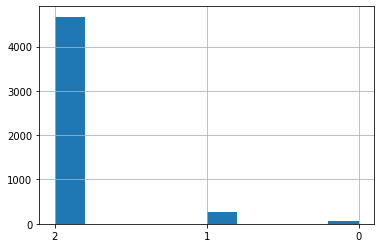

In [25]:
df['target'].astype(str).hist()

Now let's apply an over-sampling approach. We use a naive approach that is random

In [32]:
from imblearn.over_sampling import RandomOverSampler
rus= RandomOverSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
df = pd.DataFrame(y_resampled)

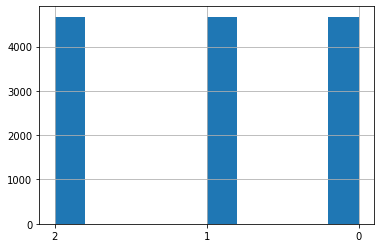

In [33]:
df[0].astype(str).hist() 
#Thus we have a normal distribution!
#other examples are k means and near miss

## Interpreting coefficients without taking into account multicolinearity
###Symptom: one predictor variable can be accurately predicted from the others

In [34]:
import seaborn as sns
import pandas as pd
import numpy as np

iris=sns.load_dataset("iris")
iris.head()
iris = iris[iris['species']!='setosa']
iris['species'] = iris['species'].apply(lambda x:1 if x == 'versicolor' else 0)

In [40]:
y = iris['species']
X = iris[['sepal_length', 'sepal_width', 'petal_length','petal_width']]

In [41]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

X=add_constant(X)

model=sm.Logit(y,X)

result=model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.9142
Time:                        19:21:22   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6378     25.708      1.659      0.097      -7.748      93.024
sepal_length     2.465

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Multicolinearity affects how we interpret P and R coefficients

**VIF (Variance inflation facotr** tells us the extend to which we have multicollinearity in our result; a factor of 5 to 10 or more is considered high and tells to be wary of model coefficients

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [44]:
pd.DataFrame(list(zip(list(X.columns), vif)))

,0,1
0,const,125.170277
1,sepal_length,3.990113
2,sepal_width,1.721954
3,petal_length,7.252447
4,petal_width,3.948354


This tells us to be wary about the coefficient for petal_length 

## Evaluating by accuracy alone
not all datasets can be fully understood by this one metric

In [45]:
X, y = make_classification(n_samples=1000, n_features = 2, n_informative=2,
                            n_redundant = 0, n_repeated = 0, n_classes = 2,
                            n_clusters_per_class=1,
                            weights=[0.95, 0.05],
                            class_sep=.8, random_state=0)


In [47]:
import pandas as pd
df = pd.DataFrame(X)
df.columns = ['feature1', 'feature2']
df['target']=y

In [50]:
df['prediction']=0

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(df['target'], df['prediction'])

0.944

###True positive and true negative Rate AKA sensitivity

In [53]:
pos = df[df['target']==1]
accuracy_score(pos['target'], pos['prediction'])

0.0

In [54]:
neg = df[df['target']==0]
accuracy_score(neg['target'], neg['prediction'])

1.0

In [56]:
df['prediction'] = np.random.randint(0,2,df.shape[0])

In [57]:
df.head()

,feature1,feature2,target,Prediction,prediction
0,-0.200228,-1.126880,0,0,1
1,-0.873630,0.999259,0,0,0
2,-0.722953,0.106167,0,0,1
3,-0.548422,1.903053,0,0,1
4,-1.254758,2.445131,0,0,1


###Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(df['target'], df['prediction'])

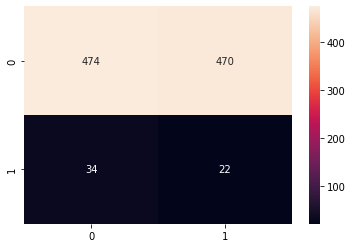

In [59]:
import seaborn as sns
sns.heatmap(confusion, annot=True, fmt='g')

###Recall is the ability of the classifier to find all the positive samples

In [60]:
from sklearn.metrics import recall_score
recall_score(df['target'], df['prediction'])

0.39285714285714285

###Precision tells us how relevant our result is

In [63]:
from sklearn.metrics import precision_score
precision_score(df['target'], df['prediction'])

0.044715447154471545

###F1 Score: the weighted average of precision and recall

In [65]:
from sklearn.metrics import f1_score
f1_score(df['target'], df['prediction'])

0.08029197080291971

###ROC curve gets a good idea of how good a model works
AUC gives the area under the curve and a good idea of how well the model worked via ROC

##Final fail: giving overly technical presentations

* lead with results not technicalities
* don't show your code, especially line-by-line
* rely on visualizations to communicate findings
* make visualizations relevant and easy to read
* Sell organizational value of your model
* speak to how your approach addresses the problem to be solved